<a href="https://colab.research.google.com/github/Prasanna-Kumar-Gaddad/Basic-Data-Science-Questions-Answers/blob/main/Level%206%20-End%20to%20End%20project%20Using%20Tensorflow/Plant-Disease-Classification/Plant_Disease_Classification_resnet_Tensorflow_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Steps to Follow**

- Pick a dataset
- Download the dataset
- Import the dataset using PyTorch
- Explore the dataset
- Prepare the dataset for training
- Create train-validation split and data loaders
- define a model or create a pretrained model
- train a model and try hyper parameters
- record the results ,make prediction on individual images
- save model


**Download the Dataset**

Using 'opendatasets' and download the dataset from https://www.kaggle.com/vipoooool/new-plant-diseases-dataset

Use below code to import 'opendatasets' library which helps to download dataset and unzip from kaggle

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

  0%|          | 5.00M/2.70G [00:00<01:04, 44.6MB/s]

100%|██████████| 2.70G/2.70G [00:27<00:00, 105MB/s] 


before downloading make account in kaggle and download API json file from kaggle and upload json file in the directory , it will automatically detect and it will download dataset

In [ ]:
# import required library
!pip install tensorflow --upgrade --quiet

import os
import numpy as np              
import pandas as pd                              
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
image_size = [224,224]

train_dir =  '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir  =  '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

diseases = os.listdir(train_dir)

In [ ]:
print(diseases)

['Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Septoria_leaf_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Target_Spot', 'Potato___healthy', 'Peach___Bacterial_spot', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Peach___healthy', 'Strawberry___Leaf_scorch', 'Pepper,_bell___healthy', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Blueberry___healthy', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Strawberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Black_rot', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___healthy', 'Grape___healthy', 'Tomato___Late_blight', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Potato___Late_blight', 'Tomato___Tomato_

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [ ]:
plants = []

NumberOfDiseases = 0

for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Number of plants: 14
Number of diseases: 26
Unique Plants are: 
['Tomato', 'Pepper,_bell', 'Orange', 'Soybean', 'Grape', 'Potato', 'Peach', 'Raspberry', 'Squash', 'Strawberry', 'Corn_(maize)', 'Blueberry', 'Cherry_(including_sour)', 'Apple']


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [ ]:
# Number of images in each class/disease

data = {}

for i in diseases:
  train_images = os.listdir('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/' + i)
  img_count = len(train_images)
  data[i] = img_count
  print("Number of images: {}  , class: {}".format(img_count , i ))

Number of images: 1882  , class: Tomato___Leaf_Mold
Number of images: 1913  , class: Pepper,_bell___Bacterial_spot
Number of images: 2010  , class: Orange___Haunglongbing_(Citrus_greening)
Number of images: 2022  , class: Soybean___healthy
Number of images: 1722  , class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Number of images: 1745  , class: Tomato___Septoria_leaf_spot
Number of images: 1920  , class: Grape___Esca_(Black_Measles)
Number of images: 1827  , class: Tomato___Target_Spot
Number of images: 1824  , class: Potato___healthy
Number of images: 1838  , class: Peach___Bacterial_spot
Number of images: 1781  , class: Raspberry___healthy
Number of images: 1736  , class: Squash___Powdery_mildew
Number of images: 1728  , class: Peach___healthy
Number of images: 1774  , class: Strawberry___Leaf_scorch
Number of images: 1988  , class: Pepper,_bell___healthy
Number of images: 1920  , class: Tomato___Early_blight
Number of images: 1702  , class: Tomato___Bacterial_spot
Number of images

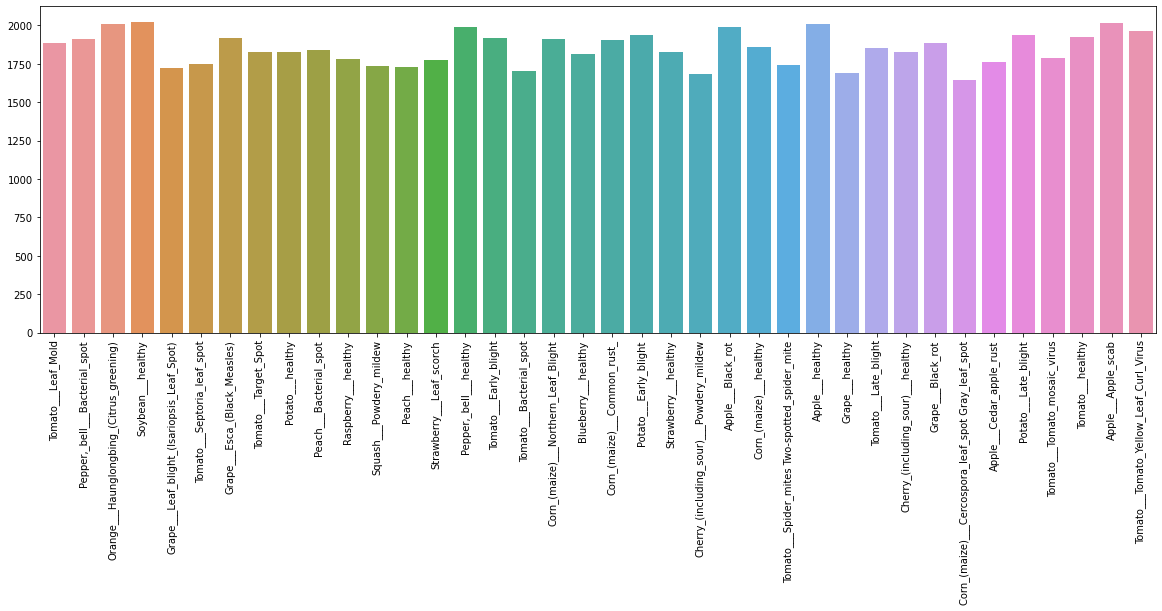

In [ ]:
# Visualizing the Data

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = list(data.keys()), y = list(data.values()))
plt.xticks(rotation=90)
plt.show()

We can observe data is nearly balanced , so we are good to go 

In [ ]:
# Images available for training
n_train = 0

for value in data.values():
    n_train += value
    
print(f"There are {n_train} images for training")

There are 70295 images for training


In [ ]:
n_test = 0

for i in diseases:
  img_count = len(os.listdir('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/' + i))
  n_test+=img_count
  
print(f"There are {n_test} images for test")

There are 17572 images for test


**Data Preparation for training**

https://keras.io/api/applications/

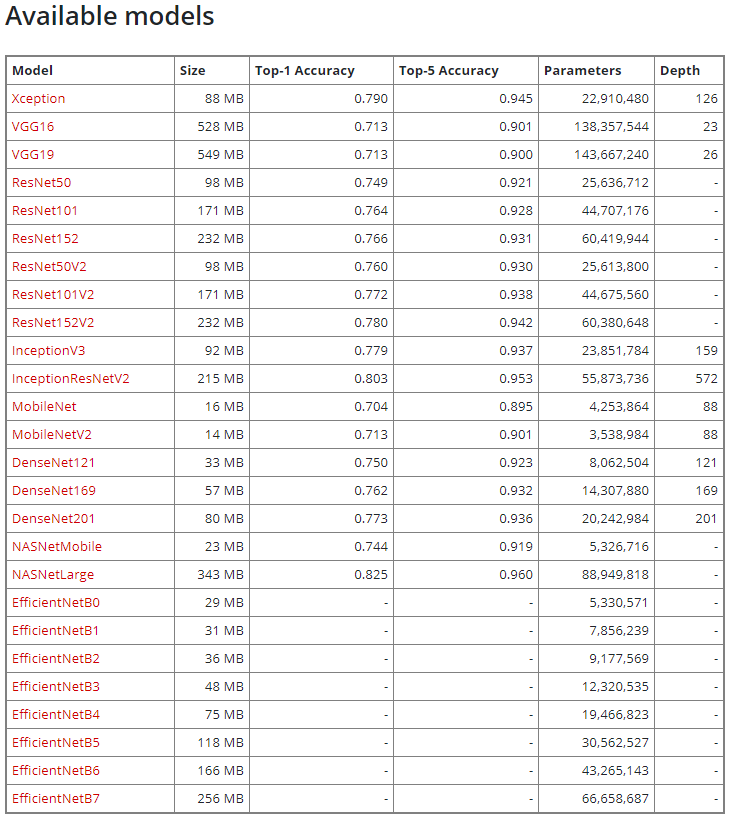

This are available transfer learning models to use

Iam importing Xception model 
- High accuracy
- Less depth(less depth neural network)
- Low latency(less depth) leads to fast prediction

this models are pretrained, transfer learning models which trained on "imagenet" dataset which has 1000 category/classes and output is also 1000 category this are labels  (https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a#file-imagenet1000_clsidx_to_labels-txt)

now we are training on custom dataset and we need only neural network structure of the model , so remove top(first) and bottom(last) layer of the model , in that space we place custom dataset input and output 

Example :-

Input(First layer as image) :

- There are no of cancer types are there for ex take 10 , here 10 classes are input which model takes.

output(Last layer as string): 
1. Binary classification : person has cancer or not (like 0 or 1)
2. Categorical Classification : In that 10 types which type it is




In [ ]:
from tensorflow.keras.applications.xception import Xception

image_size = [224 , 224]

# include_top = "False"   first layer
model = Xception(include_top=False , weights='imagenet' , input_shape=image_size + [3])

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
# xception is transfer learning model ,it already pre-trained
for layer in model.layers:
  layer.trainable = False

In [ ]:
# finding categories in data
folders = os.listdir('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
len(folders)

38

In [ ]:
# Flattening output
x = Flatten()(model.output)

# At the output layer specifying classes of the model 
# Here 38 categories are there and activation function is "softmax" for categorical data
# If its binary classification then activation function is "sigmoid"
# joining flatten layer to output (x)
prediction = Dense(len(folders) , activation='softmax')(x)


model = Model(inputs = model.input , outputs = prediction)

In [ ]:
# summary of model , total 126 Neural networks are there where it takes image as input
# size of input is 224*224*3(here 3 is RGB channel)
# output(last layer) is in any one class in 38 Disease
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
# Compiling model optimizer is Adam (popular ,accurate ,low latency)
# loss is categorical_crossentropy because its categorical
# if its binary classification then binary cross-entropy
# if its regression problem then Mean Square Error

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Data augmentation , generating more images by flipping , zoom into the images
# with 1 image traing with different angle also make prediction more accurate 

train_datagen = ImageDataGenerator(
    shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
# creating train and test datasets

train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  batch_size=32)

test_dataset = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                class_mode='categorical',
                                                batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# Training model

# uncomment and run

#%%time
#r = model.fit(
#    train_dataset,
#    validation_data=test_dataset,
#    epochs = 5,
#    steps_per_epoch=len(train_dataset),
#    validation_steps=len(test_dataset)
#)

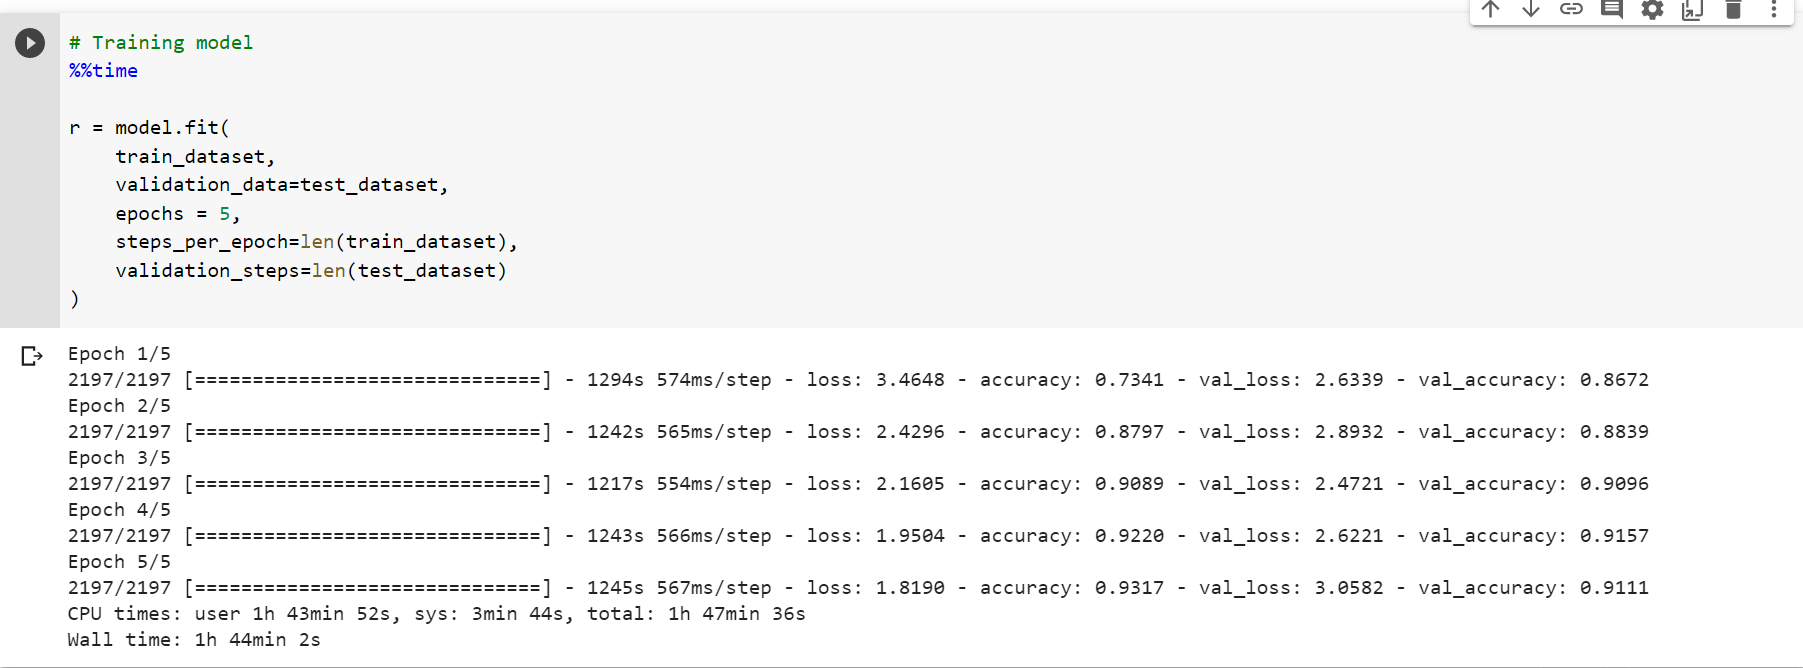

training = 93% , test = 91% , overall good accuracy , it took 1H : 44 M to train

In [ ]:
# import matplotlib.pyplot as plt

# uncomment and run

#plt.plot(r.history['loss'] , label = 'train_loss')
#plt.plot(r.history['val_loss'] , label = 'val_loss')
#plt.xlabel('epoch')
#plt.ylabel('loss')
#plt.legend(['Training', 'Validation'])
#plt.title('Loss vs. No. of epochs');
#plt.legend()
#plt.show()

#plt.plot(r.history['accuracy'] , label = 'train_acc')
#plt.plot(r.history['val_accuracy'] , label = 'val_acc')
#plt.xlabel('epoch')
#plt.ylabel('accuracy')
#plt.title('Accuracy vs. No. of epochs');
#plt.legend()
#plt.show()

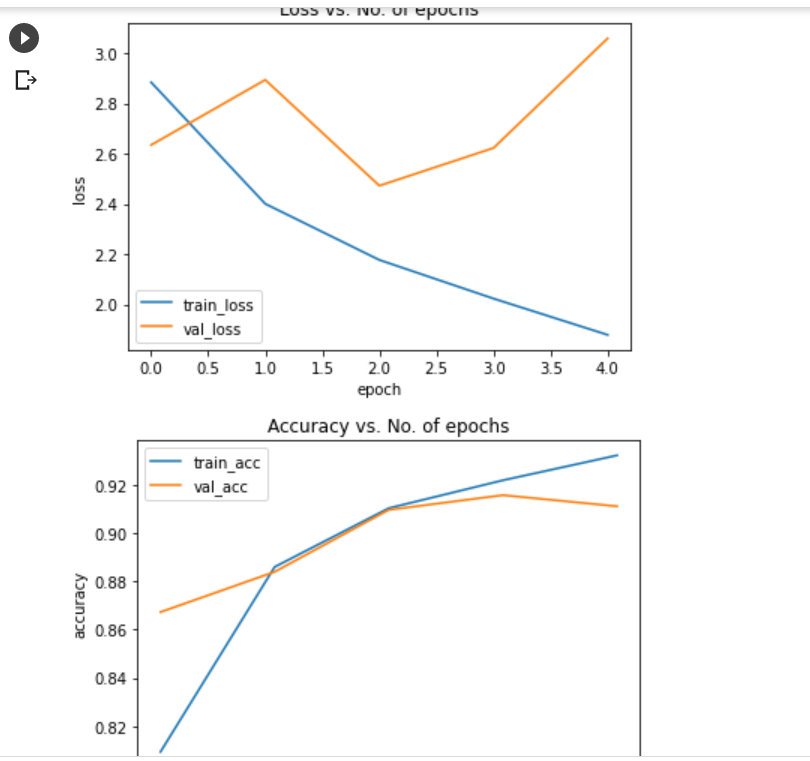

In [ ]:
# save 'Whole' model in .h5 format

# uncomment and run and don't forget the path
#model.save('/content/drive/MyDrive/models/model_xception.h5')

-------------------------------------------

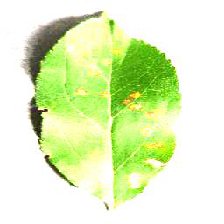

In [ ]:
from tensorflow.keras.preprocessing import image

# Load image from drive
img = image.load_img('/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG', target_size=(224,224))

img

In [ ]:
# cleaning Disease classes string
lis = os.listdir(train_dir)
data = dict()
for i,k in enumerate((lis)):
  data[i] = k.replace('___' , ' ')

In [ ]:
from tensorflow.keras.models import load_model

# load model to predict
model = load_model('/content/drive/MyDrive/models/model_xception.h5')


# convert file from img format to array format
x = image.img_to_array(img)
# rescale the images to obtain the range [0, 1] by dividing by 255
x = x/255
#increse dimention of the image
img_data=np.expand_dims(x,axis=0)
# predicted value will not point at one value ,its always distributed with argmax you can find high probability value in the list
a=np.argmax(model.predict(img_data), axis=1)

prediction = list(sorted(list(data.values())))[a[0]]

print(prediction)

Apple Cedar_apple_rust


It predicted 'Apple Cedar_apple_rust' its correct

-------------------------------------------

Here project done 

but lets see types to save a model 

if save whole model its size is 124MB for this project

Another 2 types to save a model
- using json(JavaScript Object Notation) and model weights separate
- using yaml and model weights separate

advantage of saving file and weights separate is size of the model(87kb and 93mb)


In [ ]:
# save model in json format
model_json = model.to_json()
with open('/content/drive/MyDrive/models/model.json' , 'w') as json_file:
  json_file.write(model_json)
# save model weights
model.save_weights('/content/drive/MyDrive/models/model_weights.h5')

In [ ]:
# save model in yaml format
model_yaml = model.to_yaml()
with open('/content/drive/MyDrive/models/model.yaml' , 'w') as yaml_file:
  yaml_file.write(model_yaml)
# save model weights
model.save_weights('/content/drive/MyDrive/models/model_weights.h5')

part 1 of project done , in next part of notebook load model from disk and predict, which helps in building web app using Flask or django framework